# Part 4
**For part 4 of the project, you will be using your MySQL database from part 3 to answer meaningful questions for your stakeholder.** *They want you to use your hypothesis testing and statistics knowledge to answer 3 questions about what makes a successful movie.*
### Questions to Answer
* The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

1. They want you to perform a statistical test to get a mathematically-supported answer.
2. They want you to report if you found a significant difference between ratings.
3. If so, what was the p-value of you analysis?
4. And which rating earns the most revenue?
5. They want you to prepare a visualization that supports your finding.
6. It is then up to you to think of 2 additional hypotheses to test that your stakeholder may want to know.

**Some example hypotheses you could test:**

1. Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?
2. Do movies released in 2020 earn less revenue than movies released in 2018?
3. How do the years compare for movie ratings?
4. Do some movie genres earn more revenue than others?
5. Are some genres higher rated than others?
etc.
### Specifications
## Your Data
A critical first step for this assignment will be to retrieve additional movie data to add to your SQL database.
You will want to use the TMDB API again and extract data for additional years.
You may want to review the optional lesson from Week 2 on "Using glob to Load Many Files" to load and combine all of your API results for each year.
However, trying to extract the TMDB data for all movies from 2000-2022 could take >24 hours!
To address this issue, you should EITHER:
Define a smaller (but logical) period of time to use for your analyses (e.g. last 10 years, 2010-2019 (pre-pandemic, etc).
OR coordinate with cohort-mates and divide the API calls so that you can all download the data for a smaller number of years and then share your downloaded JSON data.


##### Deliverables
You should use the same project repository you have been using for Parts 1-3 (for your portfolio).
Create a new notebook in your project repository just for the hypothesis testing (like "Part 4 - Hypothesis Testing.ipynb")
Make sure the results and visualization for all 3 hypotheses are in your notebook.
Please submit the link to your GitHub repository for this assignment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os, time,json
import tmdbsimple as tmdb 
from scipy import stats
import pymysql 
pymysql.install_as_MySQLdb()

from sqlalchemy import create_engine
from sqlalchemy_utils import create_database, database_exists

# Hypothesis Test: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?


## Null Hypothesis(H0): The MPAA rating of a movie (G/PG/PG-13/R) doesn't  affect how much revenue the movie generates.

## Alternative Hypothesis(H1):  The MPAA rating of a movie (G/PG/PG-13/R) affects how much revenue the movie generates.


# Before I perform the Hypothesis Testing I need to answer a few questions about the Business Problem I was given.¶

1. What question am I attempting to answer?

* Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

2. What metric/value do I want to measure to answer this question?

* The Revenue generated by the movies 
* The MPAA Ratings will be the groups 

3. Do I expect the groups to be different in a specific way? (i.e. one group greater than the other) Or do I just think they'll be different, but don't know how?

* I'm not expecting the groups to be different in a specific way.

In [2]:
ratings = pd.read_csv('Data/ratings.csv.gz')

ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1920
1,tt0000002,5.8,260
2,tt0000003,6.5,1728
3,tt0000004,5.6,173
4,tt0000005,6.2,2541


In [3]:
tmdb_comb = pd.read_csv('Data/combined_tmdb_dataframe.csv')

tmdb_comb.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.110,2020.0,PG
1,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.729,48.0,R
2,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.114,162.0,R
3,tt0119495,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,51181.0,en,Love 101,...,0.0,86.0,[],Released,NaN,Love 101,0.0,0.000,0.0,R
4,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R


In [4]:
tmdb_comb['certification'].value_counts()

R          453
PG-13      181
NR          68
PG          64
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

In [5]:
#I found a certification value with '-' this is an unusual value 
tmdb_comb.loc[tmdb_comb['certification'] == '-']


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
733,tt0282526,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,172550.0,it,Giorni,...,0.0,90.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,NaN,Days,0.0,5.0,7.0,-


In [6]:
#drop the '-' certification row 
tmdb_comb = tmdb_comb.drop(index=733 )


In [23]:
import os 
Folder = 'Data/'
files = sorted(os.listdir(Folder))
files

['.DS_Store',
 '.ipynb_checkpoints',
 'akas.csv.gz',
 'basics.csv.gz',
 'combined_tmdb_dataframe.csv',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'ratings.csv.gz',
 'title.akas.tsv.gz',
 'title.basics.tsv.gz',
 'title.ratings.tsv',
 'title.ratings.tsv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

In [24]:
import glob
#Make a filepath query
q = 'Data/**/final*.csv.gz'
files = sorted(glob.glob(q,recursive=True))
files

['Data/final_tmdb_data_2000.csv.gz', 'Data/final_tmdb_data_2001.csv.gz']

In [26]:
pd.read_csv(files[0])


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2020.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,tt7029820,0.0,NaN,NaN,0.0,[],NaN,604889.0,en,Scream For Christmas,...,0.0,80.0,[],Released,NaN,Scream For Christmas,0.0,0.00,0.0,NaN
1203,tt7197642,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,872676.0,en,"Goodbye, Merry-Go-Round",...,0.0,90.0,[],Released,NaN,"Goodbye, Merry-Go-Round",0.0,0.00,0.0,NaN
1204,tt7631368,0.0,/sF0gUHE0YzZNXYugTB2LFxJIppf.jpg,NaN,10000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,97186.0,fr,"I, Vampire",...,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,"I, Vampire",0.0,6.40,4.0,NR
1205,tt7802790,0.0,/etxml2M8GQzb31jcH0cdA489WCX.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,610992.0,fa,مومیایی ۳,...,0.0,98.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Mummy 3,0.0,7.00,1.0,NaN


In [36]:
df = pd.concat([pd.read_csv(file, lineterminator='\n') for file in files])
df = df.reset_index(drop=True)

df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2020.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.00,0.0,NaN
2495,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.00,0.0,NaN
2496,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.00,0.0,NaN
2497,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.00,0.0,NR


In [37]:
df.duplicated().sum()


1

In [38]:
df.drop_duplicates(inplace=True)


In [39]:
df.duplicated().sum()

0

In [31]:
#check for missing values in the dataframe
df.isna().sum()

imdb_id                     0
adult                       1
backdrop_path            1186
belongs_to_collection    2303
budget                      1
genres                      1
homepage                 2323
id                          1
original_language           1
original_title              1
overview                   51
popularity                  1
poster_path               283
production_companies        1
production_countries        1
release_date               17
revenue                     1
runtime                     1
spoken_languages            1
status                      1
tagline                  1449
title                       1
video                       1
vote_average                1
vote_count                  1
certification            1700
dtype: int64

In [40]:
#print out the value counts of belongs to collection 

df['belongs_to_collection'].value_counts()

{'id': 432207, 'name': 'The Sex Files', 'poster_path': None, 'backdrop_path': None}                                                                                   7
{'id': 403643, 'name': 'Troublesome Night Collection', 'poster_path': '/bPTx3TP4UJTHQfcLx4qIub9LXmi.jpg', 'backdrop_path': '/n3a7zF5GuxM2X8oPF6pKXqYS6ER.jpg'}        6
{'id': 39244, 'name': 'Digimon Collection', 'poster_path': '/eeHgXzsLtX7UqaBXSgxtnTqRQJK.jpg', 'backdrop_path': '/vfwyCkgzgoQ1l0trt7wIr77VL4Q.jpg'}                   3
{'id': 148065, 'name': 'Doraemon Collection', 'poster_path': '/4TLSP1KD1uAlp2q1rTrc6SFlktX.jpg', 'backdrop_path': '/rc6OFcSasL5YxBRPUQVwxmVF6h5.jpg'}                 2
{'id': 374512, 'name': 'Godzilla (Millennium) Collection', 'poster_path': '/v9fV11I7KVP9xa6UWvW2YlGtErD.jpg', 'backdrop_path': '/hhUQwi9Z7wE2kwwC1AM1AE418oU.jpg'}    2
                                                                                                                                                                

In [41]:
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    2303
True      195
Name: belongs_to_collection, dtype: int64

In [42]:
df['belongs_to_collection']

0       False
1       False
2       False
3       False
4       False
        ...  
2494    False
2495    False
2496    False
2497    False
2498    False
Name: belongs_to_collection, Length: 2498, dtype: bool

In [43]:
#check Certification 
df['certification'].value_counts()

R          453
PG-13      181
NR          68
PG          64
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

In [44]:
df.loc[df['certification'] == 'Unrated']

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
483,tt0214757,0.0,/bXyirBOA6Gxsxp4EhVz3JZuIEZS.jpg,False,0.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,169801.0,en,Held for Ransom,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They Pay or They Die,Held for Ransom,0.0,6.7,3.0,Unrated


In [46]:
df.loc[483, 'certification'] = 'NR'

In [47]:
df.loc[483, 'certification']

'NR'

In [48]:
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna=False)

NaN      1700
R         453
PG-13     181
NR         69
PG         64
G          24
NC-17       6
-           1
Name: certification, dtype: int64

In [50]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [51]:
df = df.rename(columns ={'certificiation\r':'certification'})
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2020.0,PG


In [52]:
df = df.rename(columns ={'certificiation\r':'certification'})
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2020.0,PG


In [53]:
df = df.rename(columns ={'certificiation\r':'certification'})
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2020.0,PG


In [54]:
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna=False)

NaN      1700
R         453
PG-13     181
NR         69
PG         64
G          24
NC-17       6
-           1
Name: certification, dtype: int64

In [55]:
df = df.dropna(subset=['certification'])


In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 4 to 2497
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                798 non-null    object 
 1   adult                  798 non-null    float64
 2   backdrop_path          602 non-null    object 
 3   belongs_to_collection  798 non-null    bool   
 4   budget                 798 non-null    float64
 5   genres                 798 non-null    object 
 6   homepage               94 non-null     object 
 7   id                     798 non-null    float64
 8   original_language      798 non-null    object 
 9   original_title         798 non-null    object 
 10  overview               797 non-null    object 
 11  popularity             798 non-null    float64
 12  poster_path            763 non-null    object 
 13  production_companies   798 non-null    object 
 14  production_countries   798 non-null    object 
 15  relea

In [63]:
df.loc[df['certification'] == '-']

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
2026,tt0282526,0.0,NaN,False,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,172550.0,it,Giorni,...,0.0,90.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,NaN,Days,0.0,5.0,7.0,-


In [66]:
df.drop([2026])

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.110,2020.0,PG
5,tt0118852,0.0,NaN,False,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.729,48.0,R
6,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,True,15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.114,162.0,R
7,tt0119495,0.0,NaN,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,51181.0,en,Love 101,...,0.0,86.0,[],Released,NaN,Love 101,0.0,0.000,0.0,R
11,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,False,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,tt0810831,0.0,/foJtMkj948xDdfKkAemGplkQ9ly.jpg,True,0.0,"[{'id': 16, 'name': 'Animation'}]",NaN,36200.0,ja,デジモンテイマーズ 冒険者たちの戦い,...,0.0,50.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Digimon Tamers: Battle of Adventurers,0.0,6.917,12.0,G
2452,tt0832449,0.0,/qgaVJE4SK2qRtggVyRlISKQ1zBE.jpg,True,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",https://one-piece.com/comicsanime/movie/detail...,23446.0,ja,ワンピース ねじまき島の冒険,...,0.0,60.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,One Piece: Clockwork Island Adventure,0.0,6.995,202.0,PG-13
2456,tt1073223,0.0,/le7N8M4bAM9suFGGTjvYblfmPT8.jpg,True,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 16, 'name...",https://www.tms-e.co.jp/global/alltitles/conan...,32022.0,ja,名探偵コナン 天国へのカウントダウン,...,0.0,100.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,Detective Conan: Count Down to Heaven,Case Closed: Countdown to Heaven,0.0,7.200,124.0,PG-13
2481,tt3041064,0.0,NaN,False,0.0,"[{'id': 80, 'name': 'Crime'}]",https://www.altavod.com/content/crazr,876506.0,en,CRAZY RAY,...,0.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,CRAZY RAY,0.0,0.000,0.0,NR


In [68]:
df.loc[df['certification'] == 'Unrated']

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification


In [88]:
## fix certification col
## fix certification col
replace_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '12':np.nan,
             '':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(replace_cert)
df['certification'].value_counts(dropna=False)

R        453
PG-13    181
NR        70
PG        64
G         24
NC-17      6
Name: certification, dtype: int64

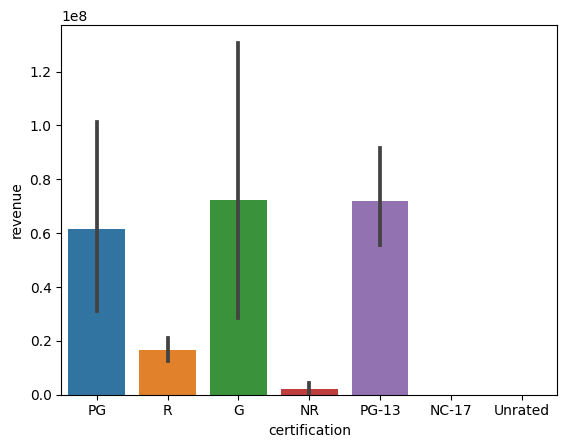

In [78]:
#Visualize the relationship between the MPAA rating variable 'certification' and the Revenue variable 
ax = sns.barplot(data=tmdb_comb, x ='certification', y ='revenue')

In [79]:
#make a variable that will save the certification names 
cert_names = df['certification'].unique()

cert_names

array(['PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'], dtype=object)

In [80]:
#Make an empty dict to hold values for our for loop as it iterates throught the Certifications and revenue 
groups = {}

for cert in cert_names: 
    temp = tmdb_comb.loc[tmdb_comb['certification']==cert, 'revenue']
    
    groups[cert] = temp

In [72]:
#check the groups 
groups

{'PG': 0       12854953.0
 10      36754634.0
 13      36609995.0
 16     354248063.0
 17      35134820.0
           ...     
 757        37641.0
 762            0.0
 769            0.0
 777            0.0
 788            0.0
 Name: revenue, Length: 64, dtype: float64,
 'R': 1           0.0
 2           0.0
 3           0.0
 4       14904.0
 7      105983.0
          ...   
 778         0.0
 782         0.0
 783         0.0
 785         0.0
 791         0.0
 Name: revenue, Length: 453, dtype: float64,
 'G': 5      224834564.0
 11     169327687.0
 14             0.0
 145     27965865.0
 199     19748009.0
 212            0.0
 229    183611771.0
 240    103291131.0
 276     45554533.0
 309     68411275.0
 350            0.0
 357            0.0
 371            0.0
 433    579707738.0
 445       100202.0
 589    165335153.0
 627            0.0
 668     44460850.0
 684     80936232.0
 707     18634654.0
 714            0.0
 760            0.0
 765            0.0
 793            0.0
 Name: r

# ANOVA Test Assumptions :¶
* No significant outliers
* Normality
* Equal Variance

# Check for Significant Outliers 

In [81]:
#Create an empty dict to store the values as the for loop iterates through the columns to check for outliers 
groups_clean = {}

#Loop through groups dict
for cert_names, group_data in groups.items(): #items is key to unlocking the dict values 
    
    #check for outliers 
    outliers = np.abs(stats.zscore(group_data)) > 3
    
    #Dispaly the number of outliers in each rcompany  
    print(f"There were {outliers.sum()} outliers in {cert_names} ")
    
    #remove outliers from data and overwrite company data in a new variable 
    
    groups_data_clean = group_data[outliers==False]
    
    groups_clean[cert_names] = groups_data_clean 

There were 1 outliers in PG 
There were 11 outliers in R 
There were 1 outliers in G 
There were 3 outliers in NR 
There were 5 outliers in PG-13 
There were 0 outliers in NC-17 


In [22]:
groups

{'PG': 0       12854953.0
 10      36754634.0
 13      36609995.0
 16     354248063.0
 17      35134820.0
           ...     
 757        37641.0
 762            0.0
 769            0.0
 777            0.0
 788            0.0
 Name: revenue, Length: 64, dtype: float64,
 'R': 1           0.0
 2           0.0
 3           0.0
 4       14904.0
 7      105983.0
          ...   
 778         0.0
 782         0.0
 783         0.0
 785         0.0
 791         0.0
 Name: revenue, Length: 453, dtype: float64,
 'G': 5      224834564.0
 11     169327687.0
 14             0.0
 145     27965865.0
 199     19748009.0
 212            0.0
 229    183611771.0
 240    103291131.0
 276     45554533.0
 309     68411275.0
 350            0.0
 357            0.0
 371            0.0
 433    579707738.0
 445       100202.0
 589    165335153.0
 627            0.0
 668     44460850.0
 684     80936232.0
 707     18634654.0
 714            0.0
 760            0.0
 765            0.0
 793            0.0
 Name: r

In [82]:
groups_clean

{'PG': 0       12854953.0
 10      36754634.0
 13      36609995.0
 16     354248063.0
 17      35134820.0
           ...     
 757        37641.0
 762            0.0
 769            0.0
 777            0.0
 788            0.0
 Name: revenue, Length: 63, dtype: float64,
 'R': 1           0.0
 2           0.0
 3           0.0
 4       14904.0
 7      105983.0
          ...   
 778         0.0
 782         0.0
 783         0.0
 785         0.0
 791         0.0
 Name: revenue, Length: 442, dtype: float64,
 'G': 5      224834564.0
 11     169327687.0
 14             0.0
 145     27965865.0
 199     19748009.0
 212            0.0
 229    183611771.0
 240    103291131.0
 276     45554533.0
 309     68411275.0
 350            0.0
 357            0.0
 371            0.0
 445       100202.0
 589    165335153.0
 627            0.0
 668     44460850.0
 684     80936232.0
 707     18634654.0
 714            0.0
 760            0.0
 765            0.0
 793            0.0
 Name: revenue, dtype: float

## Test for Normality
**Test the assumption of normality to make sure that each group has more than 20 items per group** 

In [83]:
# We can check this by checking that each certification has more than 20 samples 
df['certification'].value_counts()

R        453
PG-13    181
NR        70
PG        64
G         24
NC-17      6
Name: certification, dtype: int64

In [85]:
import scipy
from scipy.stats import shapiro


In [86]:
scipy.stats.shapiro(groups_clean)

ValueError: Data must be at least length 3.

In [87]:
stats.kruskal(groups_clean)


/Users/abibrahim/.conda/envs/dojo-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:103: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


ValueError: Need at least two groups in stats.kruskal()